In [1]:
import pandas as pd
import numpy as np

C:\Users\anish\AppData\Local\Temp\ipykernel_15552\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('total_bank_data.csv',nrows=100000)

In [3]:
df.head()

,ABCUBKR,ABCUOTHR,ABCXBKR,ABCXOTHR,ADDNONINTEXPQR,ADDNONINTEXPR,ALLOTHLR,ASCEOTHR,ASCERESR,ASDROTHR,...,UCCOMRESR,UCCOMREUR,UCCRCDR,UCLOCR,UCOTHERR,UCOVER1R,UCR,UCSCR,UNINCFORR,VOLIABR
0,0.0,0.0,0.0,0.0,0.896543,0.851559,0.363534,0.0,0.0,0.0,...,1.324821,0.565197,0.000000,0.454870,0,4.619691,7.938525,0.0,0.0,8.609526
1,0.0,0.0,0.0,0.0,0.688036,0.650281,0.310936,0.0,0.0,0.0,...,3.362082,0.000000,0.005821,2.733420,0,7.463910,12.942877,0.0,0.0,7.832570
2,0.0,0.0,0.0,0.0,0.647623,0.619826,0.149273,0.0,0.0,0.0,...,0.367941,0.000000,0.467789,1.015457,0,0.000000,10.463096,0.0,0.0,4.849629
3,0.0,0.0,0.0,0.0,1.064997,1.034980,0.222062,0.0,0.0,0.0,...,1.884215,0.000000,0.205813,2.853704,0,0.000000,14.322080,0.0,0.0,6.151532
4,0.0,0.0,0.0,0.0,0.631587,0.595708,0.735652,0.0,0.0,0.0,...,5.511599,0.000000,0.448689,3.253044,0,0.000000,22.592049,0.0,0.0,5.047434


In [4]:
df.shape

(100000, 796)

In [5]:
failed_df = pd.read_csv('Failed_Bank_Dataset_2.csv')

In [6]:
failed_df.head()

,Bank_Name,City,State,Cert,Acquiring_Institution,Closing_Date,Estimated_Loss,Total_Assets,Total_Deposits
0,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",2023-05-01,NaN,212638872000,176436706000
1,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",2023-03-12,2.400000e+09,110363650000,88612911000
2,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,2023-03-10,1.610000e+10,209026000000,175378000000
3,Almena State Bank,Almena,KS,15426,Equity Bank,2020-10-23,1.633000e+07,65733000,64941000
4,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",2020-10-16,7.247000e+06,136566000,133936000


In [7]:
failed_df.shape

(566, 9)

In [8]:
merged_df = pd.merge(df, failed_df[['Closing_Date','Cert']], left_on='CERT', right_on='Cert', how='left')

In [9]:
merged_df.head()

,ABCUBKR,ABCUOTHR,ABCXBKR,ABCXOTHR,ADDNONINTEXPQR,ADDNONINTEXPR,ALLOTHLR,ASCEOTHR,ASCERESR,ASDROTHR,...,UCCRCDR,UCLOCR,UCOTHERR,UCOVER1R,UCR,UCSCR,UNINCFORR,VOLIABR,Closing_Date,Cert
0,0.0,0.0,0.0,0.0,0.896543,0.851559,0.363534,0.0,0.0,0.0,...,0.000000,0.454870,0,4.619691,7.938525,0.0,0.0,8.609526,NaN,NaN
1,0.0,0.0,0.0,0.0,0.688036,0.650281,0.310936,0.0,0.0,0.0,...,0.005821,2.733420,0,7.463910,12.942877,0.0,0.0,7.832570,NaN,NaN
2,0.0,0.0,0.0,0.0,0.647623,0.619826,0.149273,0.0,0.0,0.0,...,0.467789,1.015457,0,0.000000,10.463096,0.0,0.0,4.849629,NaN,NaN
3,0.0,0.0,0.0,0.0,1.064997,1.034980,0.222062,0.0,0.0,0.0,...,0.205813,2.853704,0,0.000000,14.322080,0.0,0.0,6.151532,NaN,NaN
4,0.0,0.0,0.0,0.0,0.631587,0.595708,0.735652,0.0,0.0,0.0,...,0.448689,3.253044,0,0.000000,22.592049,0.0,0.0,5.047434,NaN,NaN


In [10]:
merged_df.shape

(100000, 798)

In [11]:
del df
del failed_df

In [12]:
merged_df.sort_values(by='REPDTE', inplace=True)
merged_df = merged_df.reset_index(drop=True)
#converting dates to correct format
merged_df['REPDTE'] = pd.to_datetime(merged_df['REPDTE'], format='%Y%m%d')
merged_df['Closing_Date'] = pd.to_datetime(merged_df['Closing_Date'])
#making label column

**Labelling And Splitting of merged df**

In [13]:
# Create a new column with binary values 
merged_df['FailWithin90Days'] = ((merged_df['Closing_Date'] - merged_df['REPDTE']).dt.days >= 0) & ((merged_df['Closing_Date'] - merged_df['REPDTE']).dt.days <= 90)
merged_df['FailWithin180Days'] = ((merged_df['Closing_Date'] - merged_df['REPDTE']).dt.days >= 0) & ((merged_df['Closing_Date'] - merged_df['REPDTE']).dt.days <= 180)                                              
merged_df['FailWithin365Days'] = ((merged_df['Closing_Date'] - merged_df['REPDTE']).dt.days >= 0) & ((merged_df['Closing_Date'] - merged_df['REPDTE']).dt.days <= 365)                                              
merged_df['FailWithin730Days'] = ((merged_df['Closing_Date'] - merged_df['REPDTE']).dt.days >= 0) & ((merged_df['Closing_Date'] - merged_df['REPDTE']).dt.days <= 730)

In [14]:
#since the rows are ordered by date we can split the df into train,validation,test sets 
print(merged_df['REPDTE'].head())
print(merged_df['REPDTE'].tail())


#finding data set split dates for a rough 70:15:15 split

lower_date = pd.to_datetime(merged_df['REPDTE'][int(merged_df.shape[0]*0.70)])
top_date = pd.to_datetime(merged_df['REPDTE'][int(merged_df.shape[0]*0.85)])
last_date = pd.to_datetime(merged_df['REPDTE'].iloc[-1])
print(top_date)
print(lower_date)
print(last_date)

0   2018-09-30
1   2018-09-30
2   2018-09-30
3   2018-09-30
4   2018-09-30
Name: REPDTE, dtype: datetime64[ns]
99995   2023-06-30
99996   2023-06-30
99997   2023-06-30
99998   2023-06-30
99999   2023-06-30
Name: REPDTE, dtype: datetime64[ns]
2022-09-30 00:00:00
2021-12-31 00:00:00
2023-06-30 00:00:00


In [15]:
#dropping null column and unneeded columns 
merged_df.drop(['CBLRINDQ','Closing_Date','REPYEAR','STNAME','Cert'], axis=1, inplace=True)

In [16]:
# Split the DataFrame based on date criteria
train_data = merged_df[merged_df['REPDTE'] < lower_date]
validation_data = merged_df[(merged_df['REPDTE'] >= lower_date) & (merged_df['REPDTE'] < top_date)]
test_data = merged_df[(merged_df['REPDTE'] >= top_date) & (merged_df['REPDTE'] < last_date)]
last_data = merged_df[merged_df['REPDTE'] == last_date] 

#droping date column
train_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)
validation_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)
test_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)



last_data = last_data.reset_index(drop=True)

last_data_ids = last_data[['NAME','CERT']].copy()
last_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)

C:\Users\anish\AppData\Local\Temp\ipykernel_15552\3328641820.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)
C:\Users\anish\AppData\Local\Temp\ipykernel_15552\3328641820.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data.drop(['REPDTE','NAME','CERT'], axis=1, inplace=True)
C:\Users\anish\AppData\Local\Temp\ipykernel_15552\3328641820.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [17]:
del merged_df

In [18]:
Y1t = train_data['FailWithin90Days']
Y2t = train_data['FailWithin180Days']
Y3t = train_data['FailWithin365Days']
Y4t = train_data['FailWithin730Days']
Y1v = validation_data['FailWithin90Days']
Y2v = validation_data['FailWithin180Days']
Y3v = validation_data['FailWithin365Days']
Y4v = validation_data['FailWithin730Days']
Y1s = test_data['FailWithin90Days']
Y2s = test_data['FailWithin180Days']
Y3s = test_data['FailWithin365Days']
Y4s = test_data['FailWithin730Days']
Y1ld = last_data['FailWithin90Days']
Y2ld = last_data['FailWithin180Days']
Y3ld = last_data['FailWithin365Days']
Y4ld = last_data['FailWithin730Days']

In [19]:
Y_train = np.column_stack((Y1t, Y2t, Y3t,Y4t))
train_data.drop(['FailWithin90Days','FailWithin180Days','FailWithin365Days','FailWithin730Days'], axis=1, inplace=True)
Y_val = np.column_stack((Y1v, Y2v, Y3v,Y4v))
validation_data.drop(['FailWithin90Days','FailWithin180Days','FailWithin365Days','FailWithin730Days'], axis=1, inplace=True)
Y_test = np.column_stack((Y1s, Y2s, Y3s,Y4s))
test_data.drop(['FailWithin90Days','FailWithin180Days','FailWithin365Days','FailWithin730Days'], axis=1, inplace=True)
nalastdata = np.column_stack((Y1ld, Y2ld, Y3ld,Y4ld))
last_data.drop(['FailWithin90Days','FailWithin180Days','FailWithin365Days','FailWithin730Days'], axis=1, inplace=True)

In [20]:
# Calculate the class weight ratio
class_weight_ratio0 = (len(Y_train[:,0]) - sum(Y_train[:,0])) / sum(Y_train[:,0])
class_weight_ratio1 = (len(Y_train[:,1]) - sum(Y_train[:,1])) / sum(Y_train[:,1])
class_weight_ratio2 = (len(Y_train[:,2]) - sum(Y_train[:,2])) / sum(Y_train[:,2])
class_weight_ratio3 = (len(Y_train[:,3]) - sum(Y_train[:,3])) / sum(Y_train[:,3])
print(class_weight_ratio0)
print(class_weight_ratio1)
print(class_weight_ratio2)
print(class_weight_ratio3)
class_weight_ratios = [class_weight_ratio0,class_weight_ratio1,class_weight_ratio2,class_weight_ratio3]

8293.625
4146.3125
2139.548387096774
1251.0188679245282


**Data Validation and Transformation**

In [21]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [28]:
import xgboost as xg
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [24]:
params = {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.8, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 8, 'max_leaves': None, 'min_child_weight': None,'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 240, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': 'gpu_hist', 'validate_parameters': None, 'verbosity': None, 'eta': 0.30000000000000004, 'seed': 36}

xgb = xg.XGBClassifier(**params)

eval_set = [(train_data, Y_train[:,1]), (validation_data, Y_val[:,1])]
xgb.fit(train_data, Y_train[:,1],
# Fitting the model
          eval_set = eval_set,
          verbose=100)

C:\Users\anish\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [12:45:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[0]	validation_0-logloss:0.09252	validation_1-logloss:0.09203
[100]	validation_0-logloss:0.00007	validation_1-logloss:0.00009
[200]	validation_0-logloss:0.00007	validation_1-logloss:0.00009
[239]	validation_0-logloss:0.00007	validation_1-logloss:0.00009


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eta=0.30000000000000004,
              eval_metric=None, feature_types=None, gamma=0.8, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=240,
              n_jobs=None, num_parallel_tree=None, ...)

In [26]:
y_pred = xgb.predict_proba(validation_data)
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred[:,1]]

In [29]:
f1_scores = f1_score(Y_val[:,1], y_pred_binary)
auc = roc_auc_score(Y_val[:,1], y_pred_binary)  
print(f'AUC: {auc}')

# f1_scores will be an array of F1 scores for each label
print(f'F1 Score: {f1_scores}')

C:\Users\anish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [30]:
y_pred = xgb.predict_proba(test_data)

In [31]:
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred[:,1]]

In [32]:
f1_scores = f1_score(Y_test[:,1], y_pred_binary)
auc = roc_auc_score(Y_test[:,1], y_pred_binary)  
print(f'AUC: {auc}')

# f1_scores will be an array of F1 scores for each label
print(f'F1 Score: {f1_scores}')

AUC: 0.5
F1 Score: 0.0


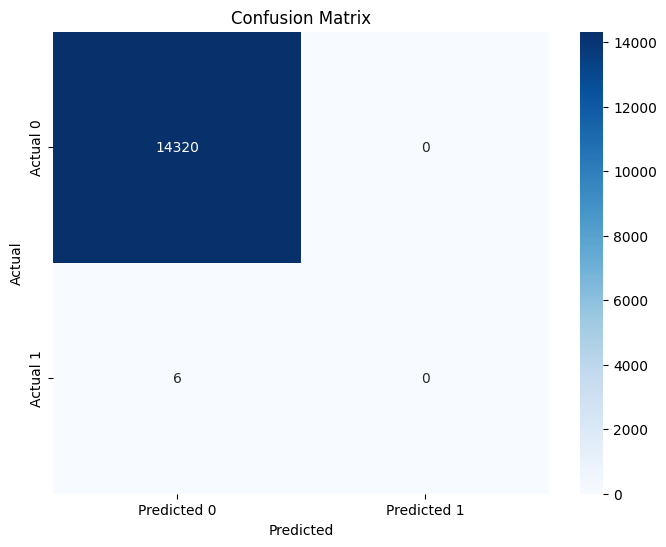

Confusion Matrix:
[[14320     0]
 [    6     0]]


In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Replace these with your actual predictions and true labels



# Create a confusion matrix
cm = confusion_matrix(Y_test[:,1], y_pred_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Confusion Matrix:")
print(cm)

In [38]:
#predicting the next failer since last date: 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

y_pred= xgb.predict(last_data)
last_data_ids['Pred'] = y_pred
sorted_results = last_data_ids.sort_values(by="Pred",ascending=False)
print(sorted_results[:20])

                              NAME   CERT  Pred
0                 FIRST STATE BANK  19163     0
3130               TRI-COUNTY BANK    977     0
3146              FIRST STATE BANK   9879     0
3145           AMERICAN STATE BANK   9967     0
3144               BANK OF DELIGHT     99     0
3143       G W JONES EXCHANGE BANK    999     0
3142             CAPON VALLEY BANK   9998     0
3141       JEFFERSON SECURITY BANK   9997     0
3140  FARMERS&MERCHANTS BK CRAIG C   9986     0
3139    FIRST STATE BANK OF UVALDE   9978     0
3138                      F&M BANK   9963     0
3137        SECURITY BANK&TRUST CO   9881     0
3136          VALLEY EXCHANGE BANK   9947     0
3135              RIVERS EDGE BANK   9935     0
3134      COMMERCIAL STB OF WAGNER   9932     0
3133        ANDERSON BROTHERS BANK   9923     0
3132                 MID PENN BANK   9889     0
3147                       BANK360   9875     0
3148                 ST HENRY BANK   9871     0
3149               BLOOMSDALE BANK   978